## IRIS DATASET CLASSIFICATION USING DECISION TREES

In [2]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;

# to show output in this respective file and not another window
%matplotlib inline 


In [3]:
from sklearn.datasets import load_iris;

In [4]:
iris = load_iris();

In [5]:
print(iris['DESCR']);

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Input features:<br>
    - sepal length in cm<br>
    - sepal width in cm<br>
    - petal length in cm<br>
    - petal width in cm<br>

Target features:<br>
    - Iris-Setosa -> 0 <br>
    - Iris-Versicolour -> 1<br>
    - Iris-Virginica -> 2<br>

In [6]:
# independent features
X = pd.DataFrame(iris['data'], columns=['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm'])

In [7]:
# dependent feature (target)
y = iris['target']

In [8]:
from sklearn.model_selection import train_test_split;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10);

In [9]:
## Applying Decision Tree
from sklearn.tree import DecisionTreeClassifier;

treeClassifier = DecisionTreeClassifier();

In [10]:
# Training
treeClassifier.fit(X_train, y_train);

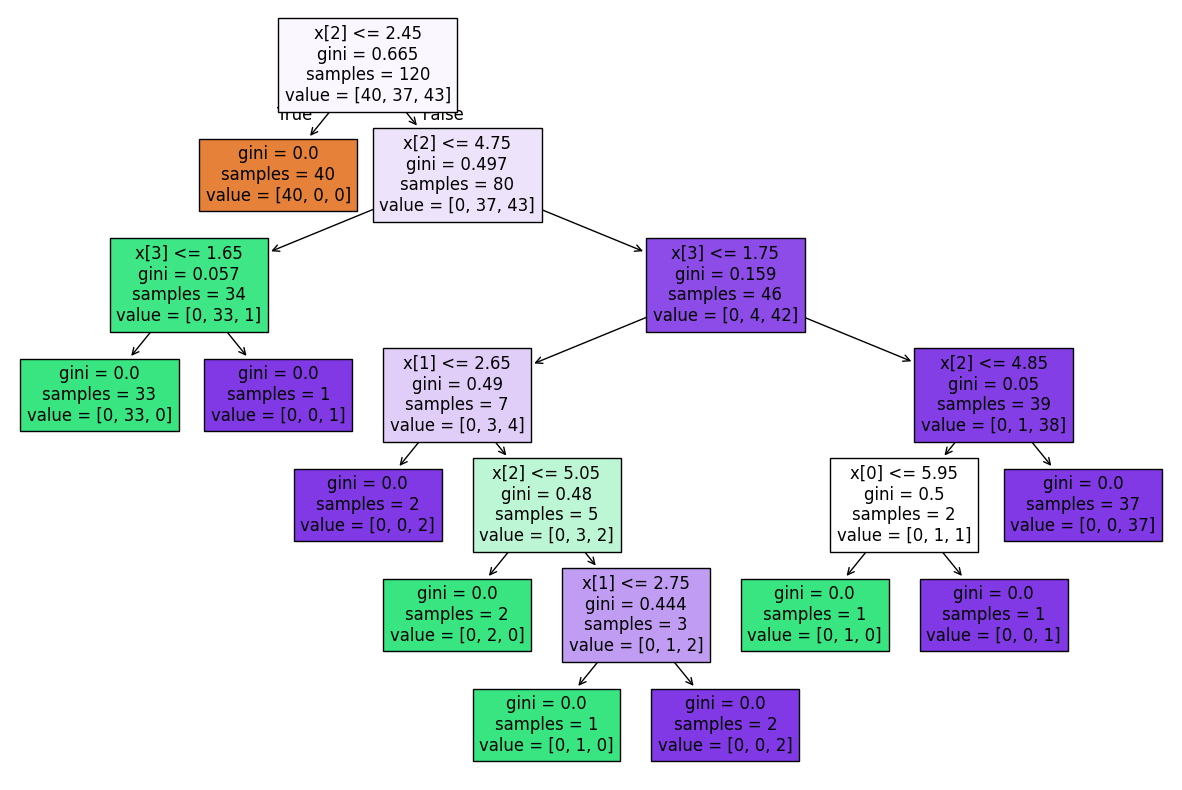

In [11]:
# Visualizing
from sklearn import tree;
plt.figure(figsize=(15, 10));
tree.plot_tree(treeClassifier, filled=True);
plt.show();

This can result in overfitting to overcome that we have:
1. Post Pruning
2. Pre Pruning

### Post Pruning 

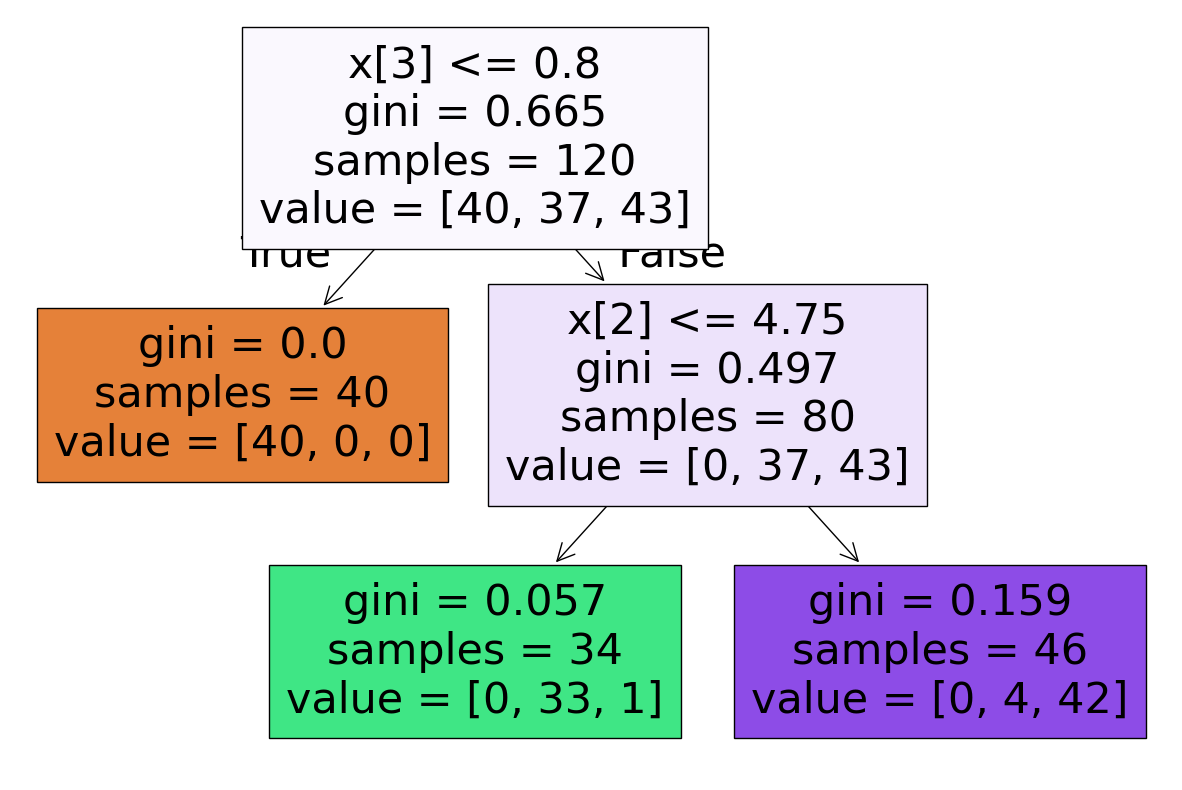

In [12]:
## Applying Decision Tree - post pruning
treeClassifier_post = DecisionTreeClassifier(max_depth=2);

treeClassifier_post.fit(X_train, y_train);

plt.figure(figsize=(15, 10));
tree.plot_tree(treeClassifier_post, filled=True);
plt.show();


In [13]:
y_pred = treeClassifier_post.predict(X_test);

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred);
print(cm);
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



### PrePruning and Hyperparameter tuning

In [ ]:
param = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5],
    'max_features': ['auto', 'log2', 'sqrt']
}

In [25]:
from sklearn.model_selection import GridSearchCV;

treeClassifier_pre = DecisionTreeClassifier();
'''
GridSearchCV test model for each combination of parameters and then find the best parameters
cv -> Cross-validation is a method to reliably test model performance.
Instead of training on one part of the data and testing on another just once, CV does this multiple times:

Example: 5-fold CV
Split the dataset into 5 equal parts (“folds”).
For each fold:
Use 4 folds for training.
Use 1 fold for testing.
Measure accuracy on the test fold.
Repeat this so that every fold is used once as a test set.
Take the average accuracy across the 5 runs → that’s the score.

👉 This way, the model is evaluated on all the data, and we avoid the risk of results depending too much on just one train-test split.
'''
grid = GridSearchCV(treeClassifier_pre, param_grid = param, cv = 5, scoring = 'accuracy')

import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train);

In [19]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [20]:
grid.best_score_

np.float64(0.9416666666666667)

In [21]:
y_pred = grid.predict(X_test)

In [22]:
y_pred

array([2, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       1, 0, 1, 0, 1, 1, 2, 2])

In [23]:
cm = confusion_matrix(y_test, y_pred);
print(cm);
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 10  3]
 [ 0  2  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      0.77      0.80        13
           2       0.62      0.71      0.67         7

    accuracy                           0.83        30
   macro avg       0.82      0.83      0.82        30
weighted avg       0.84      0.83      0.84        30



In [24]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.8333333333333334
